[Bag of Words Meets Bags of Popcorn](https://www.kaggle.com/c/word2vec-nlp-tutorial/data)
======

## Data Set

The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews. The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. In addition, there are another 50,000 IMDB reviews provided without any rating labels.

## File descriptions

labeledTrainData - The labeled training set. The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review.
## Data fields

* id - Unique ID of each review
* sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
* review - Text of the review

## Objective
Objective of this dataset is base on **review** we predict **sentiment** (positive or negative) so X is **review** column and y is **sentiment** column

## 1. Load Dataset
we only forcus on "labeledTrainData.csv" file

Let's first of all have a look at the data.

[Click here to download dataset](https://s3-ap-southeast-1.amazonaws.com/ml101-khanhnguyen/week3/assignment/labeledTrainData.tsv)

In [1]:
# Import pandas, numpy
import numpy as np
import pandas as pd
data =pd.read_csv('labeledTrainData.tsv',sep='\t', encoding="latin-1")
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


## 2. Preprocessing

In [2]:
# stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# import re
# def preprocessor(text):
#     """ Return a cleaned version of text
#     """
#     # Remove HTML markup
#     text = re.sub('<[^>]*>', '', text)
#     # Save emoticons for later appending
#     emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
#     # Remove any non-word character and append the emoticons,
#     # removing the nose character for standarization. Convert to lower case
#     text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
#     return text

# # Create some random texts for testing the function preprocessor()
# print(preprocessor(':-P :-D hellO'))

In [4]:
# # Removing special characters and "trash"
import re
def preprocessor(text):
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    
    # Save emoticons for later appending
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    #Remove emoticons
    text=re.sub('(?::|;|=)(?:-)?(?:\)|\(|D|P)','', text)
    # Remove any non-word character and append the emoticons,
    # removing the nose character for standarization. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', '')).strip()
    return text

In [5]:
# tokenizer and stemming
# tokenizer: to break down our twits in individual words
# stemming: reducing a word to its root
from nltk.stem import PorterStemmer
porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [6]:
# split the dataset in train and test
from sklearn.model_selection import train_test_split

X = data['review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## 3. Create Model and Train 

Using **Pipeline** to concat **tfidf** step and **LogisticRegression** step

In [7]:
# Import Pipeline, LogisticRegression, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=stop,
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0))])
clf.fit(X_train, y_train)

C:\Users\COMPUTER\.conda\envs\image\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'ha', 'hi', 'onc', 'onli', 'ourselv', 'themselv', 'thi', 'veri', 'wa', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
C:\Users\COMPUTER\.conda\envs\image\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessor at 0x000002DB70BA5C80>,
                                 smooth_idf=True,
                                 stop_words=['i', 'me', 'my', 'mysel...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenizer_porter at 0x000002DB70C2B048>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
      

## 4. Evaluate Model

In [8]:
# Using Test dataset to evaluate model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
# classification_report
print('classification report:\n',classification_report(y_test,predictions))
# confusion matrix
print('confusion matrix:\n',confusion_matrix(y_test,predictions))

accuracy: 0.8850666666666667
classification report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      3796
           1       0.87      0.90      0.89      3704

    accuracy                           0.89      7500
   macro avg       0.89      0.89      0.89      7500
weighted avg       0.89      0.89      0.89      7500

confusion matrix:
 [[3293  503]
 [ 359 3345]]


In [9]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

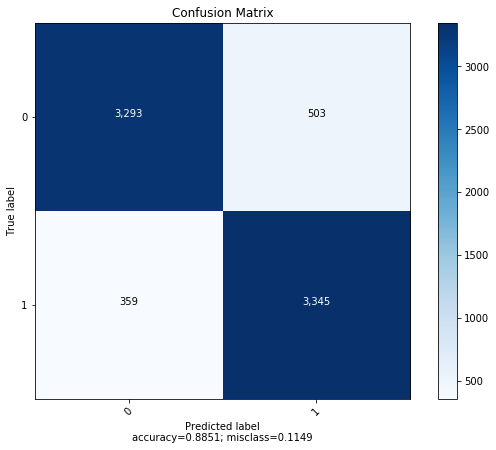

In [13]:
plot_confusion_matrix(cm           = confusion_matrix(y_test,predictions), 
                      normalize    = False,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")

## 5. Export Model 

In [14]:
# Using pickle to export our trained model
import pickle
import os

pickle.dump(clf, open("Homework6.pkl","wb"))